<a href="https://colab.research.google.com/github/ajit04022000/MACHINE_LEARNING/blob/main/12)Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

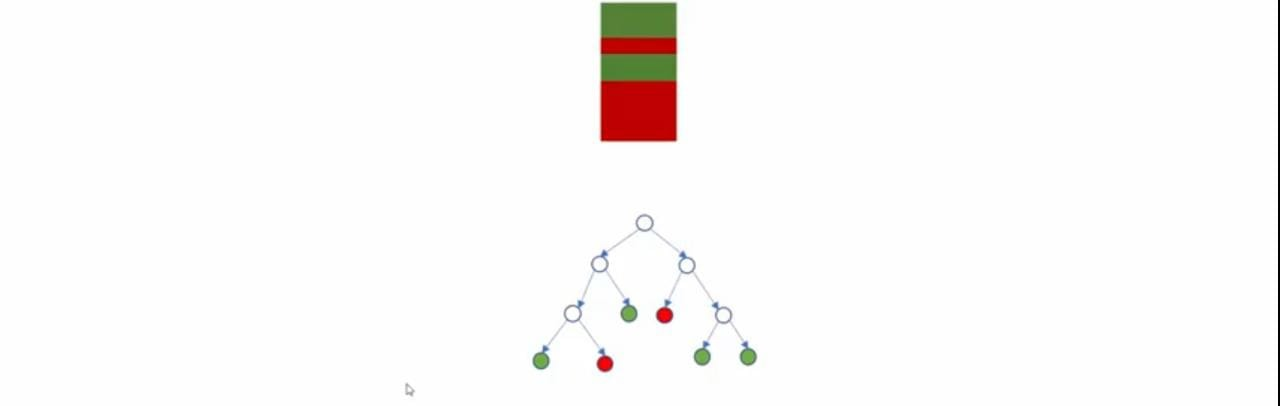

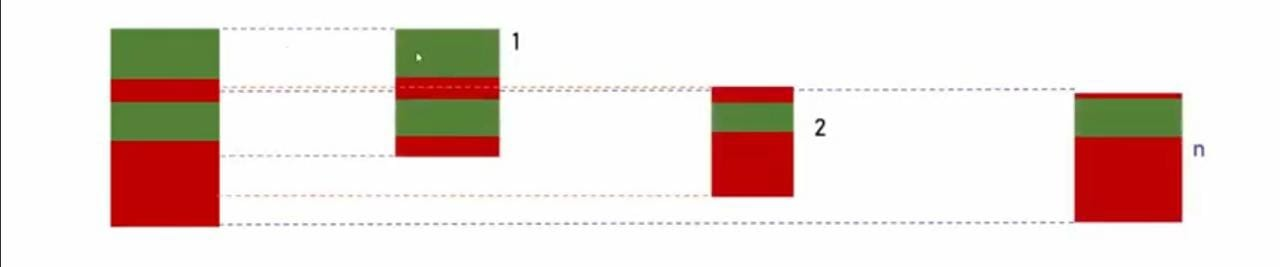

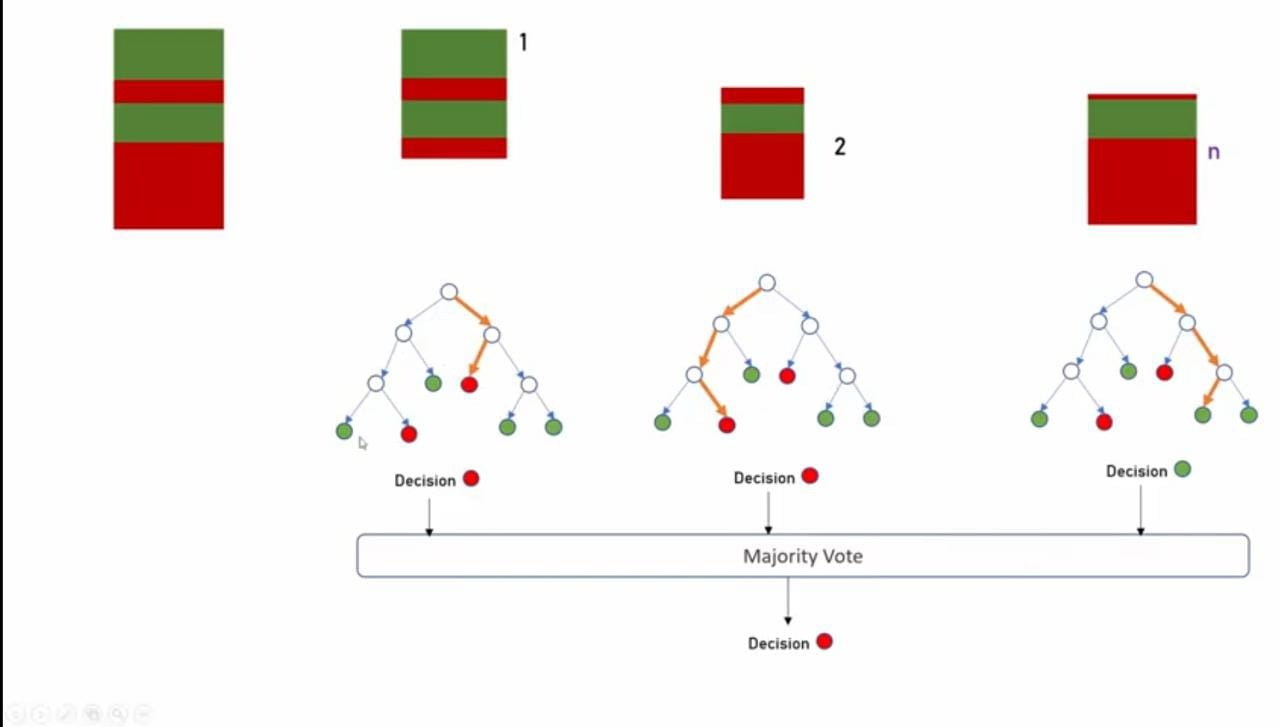

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()

In [ ]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 432x288 with 0 Axes>

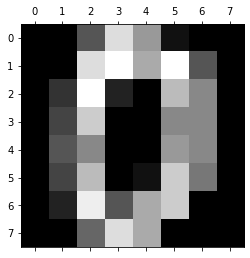

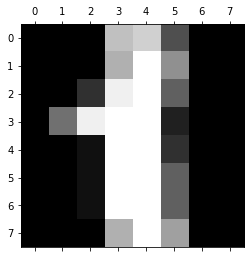

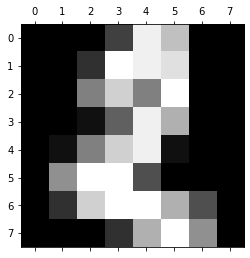

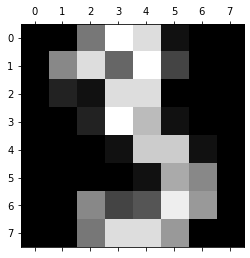

In [ ]:
plt.gray()
for i in range(4):
  plt.matshow(digits.images[i])

In [ ]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [ ]:
digits.target[:4]

array([0, 1, 2, 3])

In [ ]:
df = pd.DataFrame(digits.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [ ]:
df['target']=digits.target
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [ ]:
X = df.drop(['target'],axis=1)
y = df.target

In [ ]:
y

0       0
1       1
2       2
3       3
4       4
       ..
1792    9
1793    0
1794    8
1795    9
1796    8
Name: target, Length: 1797, dtype: int64

In [ ]:
X

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [ ]:
len(X_train)

1437

In [ ]:
len(X_test)

360

In [ ]:
len(X)

1797

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
model.score(X_test,y_test)

0.9861111111111112

In [ ]:
# hyper tuning
model = RandomForestClassifier(n_estimators=40)
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.975

In [ ]:
y_predict = model.predict(X_test)
y_predict

array([2, 7, 9, 9, 3, 2, 6, 9, 2, 9, 0, 8, 9, 7, 9, 2, 9, 9, 4, 9, 6, 3,
       8, 6, 9, 9, 1, 2, 8, 7, 9, 6, 1, 2, 9, 2, 3, 1, 2, 2, 9, 6, 4, 6,
       2, 3, 8, 4, 8, 1, 0, 9, 7, 0, 0, 6, 5, 6, 7, 9, 1, 0, 9, 4, 7, 5,
       3, 9, 2, 8, 3, 4, 5, 3, 9, 2, 1, 2, 3, 2, 0, 8, 6, 5, 2, 7, 3, 3,
       4, 4, 7, 9, 1, 6, 7, 3, 0, 3, 4, 4, 2, 6, 8, 7, 1, 7, 8, 9, 5, 9,
       2, 0, 2, 1, 8, 8, 0, 5, 8, 1, 2, 4, 0, 6, 9, 2, 4, 7, 4, 3, 4, 6,
       2, 3, 9, 2, 5, 9, 9, 1, 6, 2, 5, 1, 4, 2, 3, 0, 3, 3, 4, 8, 3, 6,
       3, 9, 2, 5, 3, 7, 5, 9, 3, 8, 7, 0, 8, 4, 6, 9, 4, 8, 1, 8, 2, 6,
       5, 9, 0, 6, 5, 9, 6, 6, 1, 4, 6, 5, 5, 4, 9, 0, 1, 5, 7, 1, 1, 2,
       9, 7, 5, 6, 5, 4, 7, 0, 9, 1, 0, 7, 6, 8, 4, 5, 0, 8, 5, 2, 7, 7,
       0, 7, 8, 7, 2, 6, 9, 1, 0, 9, 6, 6, 0, 8, 3, 1, 2, 2, 7, 6, 1, 3,
       6, 4, 9, 4, 2, 0, 1, 5, 8, 4, 7, 0, 7, 8, 6, 3, 9, 0, 6, 5, 3, 8,
       5, 1, 3, 7, 1, 2, 4, 7, 0, 1, 3, 4, 5, 7, 1, 0, 8, 2, 6, 7, 1, 5,
       3, 8, 8, 6, 1, 1, 2, 3, 4, 5, 8, 9, 3, 5, 1,

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predict)
cm

array([[30,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 34,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 41,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 35,  0,  1,  0,  0,  2,  0],
       [ 0,  1,  0,  0, 35,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 32,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 36,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 30,  0,  1],
       [ 0,  1,  0,  1,  0,  0,  0,  1, 34,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  0, 44]])

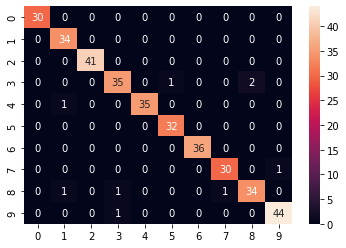

In [ ]:
sns.heatmap(cm,annot=True)

##<b>EXCERCISE:

Use famous iris flower dataset from sklearn.datasets to predict flower species using random forest classifier.

1. Measure prediction score using default n estimators (10)

2. Now fine tune your model by changing number of trees in your classifer and tell me what best score you can get using how many trees

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [ ]:
import pandas as pd
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(['target'],axis='columns'),iris.target,test_size=0.2)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
model.score(X_test,y_test)

0.8666666666666667

In [ ]:
model = RandomForestClassifier(n_estimators=40)
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.8666666666666667